In [244]:
import pandas as pd
import os
os.getcwd()

'/Users/rabindhakal/Downloads'

In [245]:
movie = pd.read_csv("P4-Movie-Ratings.csv")

In [246]:
movie.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [247]:
len(movie)

559

In [248]:
movie.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [249]:
movie.columns = ["Film","Genre","CriticRatings%","AudienceRatings%",
                 "BudgetMillions","Year"]

In [250]:
movie.columns

Index(['Film', 'Genre', 'CriticRatings%', 'AudienceRatings%', 'BudgetMillions',
       'Year'],
      dtype='object')

In [251]:
movie.head()

,Film,Genre,CriticRatings%,AudienceRatings%,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [252]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [253]:
# Changing Film,Genre and Year to category

movie.Film = movie.Film.astype("category")
movie.Genre = movie.Genre.astype("category")
movie.Year = movie.Year.astype("category")



In [254]:

movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                559 non-null category
Genre               559 non-null category
CriticRatings%      559 non-null int64
AudienceRatings%    559 non-null int64
BudgetMillions      559 non-null int64
Year                559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [255]:
movie.describe()

,CriticRatings%,AudienceRatings%,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [256]:
# To check different types of genre in Genre
movie.Genre.cat.categories


Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

------------

In [257]:
#Creating Joint Plots

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

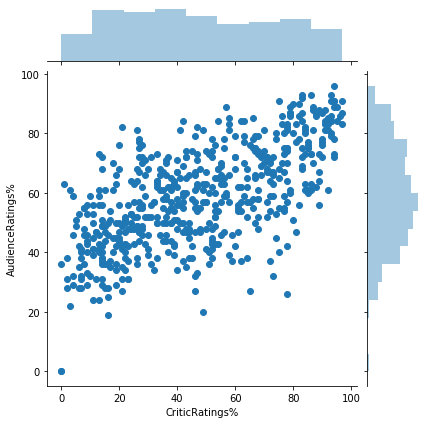

In [258]:
j = sns.jointplot(data = movie, x="CriticRatings%", y="AudienceRatings%")

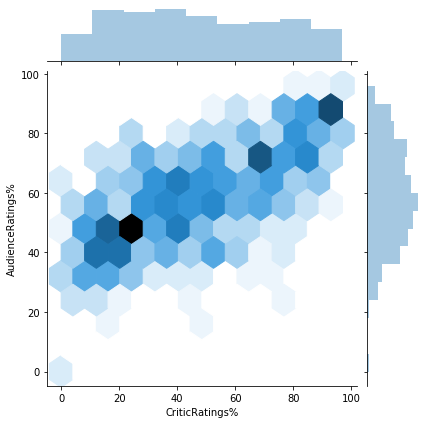

In [259]:
# changing plot into hexagon style
j = sns.jointplot(data = movie, x="CriticRatings%", y="AudienceRatings%", kind="hex")

------

#Histogram



In [260]:
#using Seaborn

#m1 = sns.distplot(movie.CriticRatings%, bin=15)
#sns.set_style("white")
#sns.set_style("darkgrid")

In [261]:
#Using pyplot

#n1 = plt.hist(movie.AudienceRatings%, bins=15)

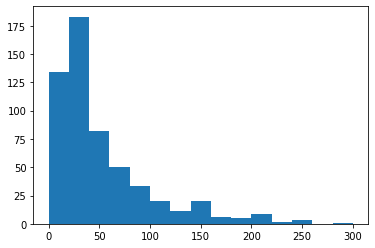

In [262]:
#creating stacked histogram
plt.hist(movie.BudgetMillions, bins=15)
plt.show()

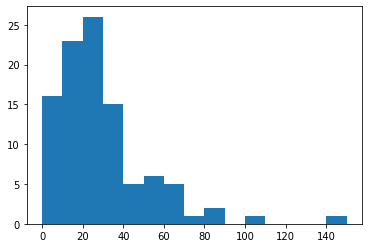

In [263]:
#Filtering data set
movie.Genre=="Drama"
movie[movie.Genre=="Drama"].BudgetMillions
plt.hist(movie[movie.Genre=="Drama"].BudgetMillions, bins=15)
plt.show()

#Stacking histogram---

In [264]:
#option 1: manually
'''plt.hist(movie[movie.Genre=="Drama"].BudgetMillions,
         [movie.Genre=="Action"].BudgetMillions,
         [movie.Genre=="Thriller"].BudgetMillions,
         [movie.Genre=="Comedy"].BudgetMillions,
         bins=15, stacked=True)
'''

'plt.hist(movie[[movie.Genre=="Drama"].BudgetMillions,\n         [movie.Genre=="Action"].BudgetMillions,\n         [movie.Genre=="Thriller"].BudgetMillions,\n         [movie.Genre=="Comedy"].BudgetMillions],\n         bins=15, stacked=True)\n'

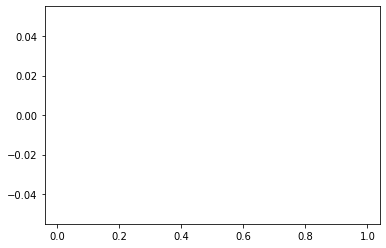

In [269]:
#option 2: creating loop
list1 = []
for gen in movie.Genre.cat.categories:
    list1.append(movie[movie.Genre=="gen"].BudgetMillions)
h = plt.hist(list1)
plt.show()

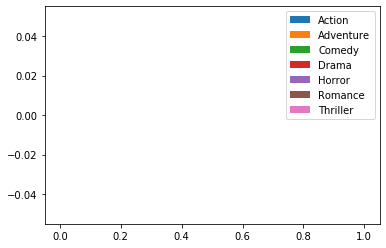

In [272]:
#Stacking
list1 = []
mylabels = []
for gen in movie.Genre.cat.categories:
    list1.append(movie[movie.Genre=="gen"].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(list1, bins=30,stacked=True,rwidth=1,label=mylabels)
plt.legend()
plt.show()